
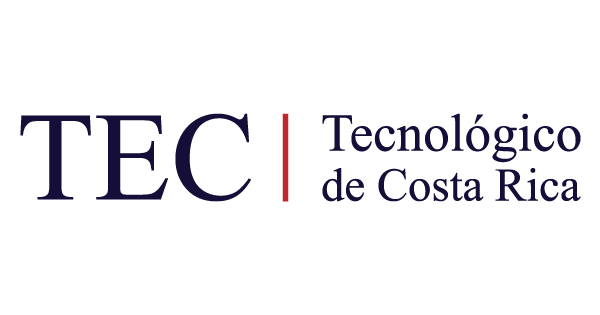
##                                          Ciencia de Datos
###                              Trabajo final para el curso Apredizaje Automático

Elaborado por:
* Anthony Cascante
* Michael Yip

9 de setiembre del 2019
_________________________________________________________________________________________
    

# Descripcion del Problema

Según información de la Organización Mundial de la Salud (OMS),  en Costa Rica la tasa de muertes por accidentes de tránsito se ubica en 13.9 para el año 2016 (Muertes por cada 100,000 habitantes).   Esa cifra coloca a Costa Rica en la posición número 56 de muertes por carretera.  Con esa tasa de mortalidad el fenómeno alcanza el rango de epidemia según criterios de la misma OMS, que la define como aquel mal que ocasiona más de 10 muertes por 100,000 habitantes.

A nivel mundial,  los accidentes de tránsito son la principal causa de muerte de personas entre los 15 y 29 años y la octava causa de muerte para todos los rangos de edad.

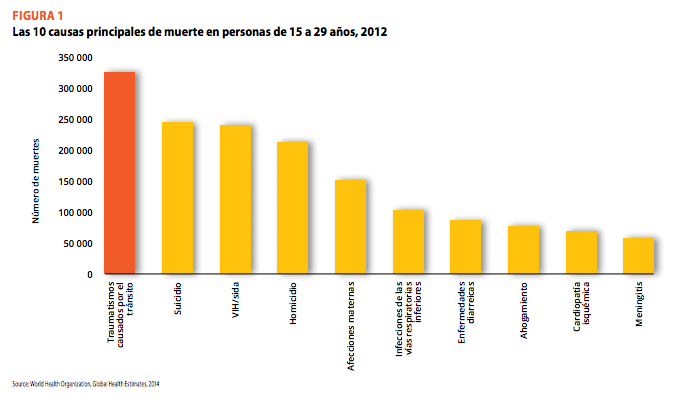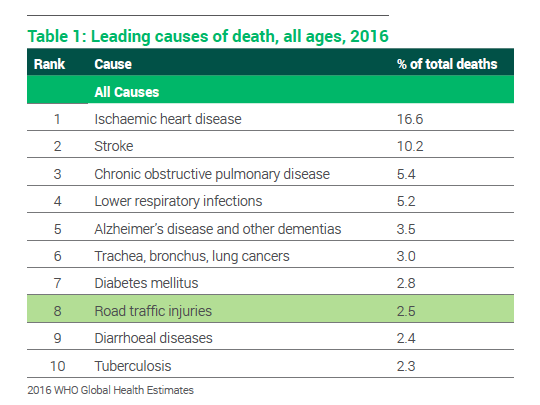

La OMS ha publicado un interesante visualizador de datos que muestra información actualizada sobre la gravedad del fénomeno de muertes en carretera.  Se puede encontrar el el siguiente enlace:

https://extranet.who.int/roadsafety/death-on-the-roads/#deaths


Fuentes:
https://www.who.int/violence_injury_prevention/road_safety_status/2018/en/
https://www.who.int/es/news-room/fact-sheets/detail/road-traffic-injuries
https://www.nacion.com/el-pais/servicios/costa-rica-entra-en-emergencia-por-epidemia-de-muertes-en-vias/UNE46265ONBRTGY6WJ4A6BFGHQ/story/


Con un presupuesto para el 2019 de casi 40,000 millones de colones,  el COSEVI es la Institución encargada de velar por la prevención de accidentes en Costa Rica.  Esta agencia recopila y publica datos de estadísticas de accidentes desde el 2013.

Se han realizado estudios estadísticos sobre las principales causas de muertes en carretera, pero al menos los que se pueden accesar en forma pública,  se limitan a analizar una variable específica como localización o peligrosidad de la carretera o características de las víctimas:

https://www.csv.go.cr/documents/10179/10911/An%C3%A1lisis+Espacial+de+accidentes+de+tr%C3%A1nsito.pdf/ed29839e-8374-47e4-9fdc-01a89a068bbb

http://www.ts.ucr.ac.cr/binarios/pela/pl-000015.pdf


## Hipótesis
La causalidad de muertes por accidentes de tránsito es un fenómeno multivariable y es posible mediante herramientas de aprendizaje supervisado, descubrir patrones que expliquen esa causalidad, y que sirvan como insumo para el establecimiento de políticas públicas para reducir la tasa de mortalidad por accidentes de tránsito.

## Objetivo

Utilizar datos públicos sobre accidentes en Costa Rica para desarrollar un modelo de aprendizaje supervisado que permita descubrir patrones sobre la incidencia de muertes en accidentes de tránsito en Costa Rica.

## Fuente de datos

Se usa una base de datos sobre accidentes para el período de tiempo 2013-2017, publicada en el portal de Datos Abiertos del Gobierno de la República de Costa Rica:

https://www.csv.go.cr/documents/10179/38161/2019+PRESUPUESTO+CONSOLIDADO+%28OFICIO+C.G.R.%29


## METODOLOGIA

En esta trabajo se sigue la siguiente metodología:

1. Se cargan los datos y se realiza una exploración preliminar de los datos  
2. Preprocesamiento, resolver problema de datos faltantes y desbalance de datos
3. Aplicación del modelo de aprendizaje supervisado
4. Evaluación de los resultados del modelo
5. Análisis de resultados
6. Conclusiones

#  Carga y exploración de los datos

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\myip\\cosevi-accidentes\\accidentes_transito_cr.csv')

Dimensiones del dataset

In [2]:
df.shape

(70549, 22)

Inspeccion General

In [3]:
df.head(5)

,A_Accidente,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,...,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Calzada horizontal,Tipo de calzada,Estado del tiempo,Tipo de circulación,Dia,Mes.1
0,1,Con muertos o graves,Salió de la vía,2015,Enero,Domingo,21,18:00-23:59,Puntarenas,Coto Brus,...,11,Nacional,Urbana,Desconocida,Curva,Asfalto,Oscuro,Objeto Fijo,1.Domingo,A. Enero
1,1,Solo heridos leves,Colisión con objeto fijo,2013,Marzo,Domingo,5,00:00-05:59,San José,San José,...,0,Nacional,Urbana,Pendiente,Curva,Asfalto,Buen tiempo,Desconocido,1.Domingo,C. Marzo
2,1,Solo heridos leves,Vuelco,2013,Febrero,Miércoles,12,12:00-17:59,San José,Puriscal,...,18,Nacional,Rural,Pendiente,Curva,Asfalto,Buen tiempo,Lateral en sentido contrario,4.Miércoles,B. Febrero
3,1,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,17,12:00-17:59,San José,Mora,...,2,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto,4.Miércoles,B. Febrero
4,1,Solo heridos leves,Atropello a persona,2013,Marzo,Miércoles,7,06:00-11:59,San José,Mora,...,15,Nacional,Rural,Plano,Recta,Asfalto,Buen tiempo,Desconocido,4.Miércoles,C. Marzo


Nombre de las columnas enteras

In [4]:
df.columns

Index(['A_Accidente', 'Clase de accidente', 'Tipo de accidente', 'Año', 'Mes',
       'Día', 'Hora', 'Hora recodificada', 'Provincia', 'Cantón', 'Distrito',
       'Ruta', 'Kilómetro', 'Tipo ruta', 'Rural o urbano', 'Calzada vertical',
       'Calzada horizontal', 'Tipo de calzada', 'Estado del tiempo',
       'Tipo de circulación', 'Dia', 'Mes.1'],
      dtype='object')

Tipo de dato de las columnas

In [5]:
df.dtypes

A_Accidente             int64
Clase de accidente     object
Tipo de accidente      object
Año                     int64
Mes                    object
Día                    object
Hora                    int64
Hora recodificada      object
Provincia              object
Cantón                 object
Distrito               object
Ruta                   object
Kilómetro              object
Tipo ruta              object
Rural o urbano         object
Calzada vertical       object
Calzada horizontal     object
Tipo de calzada        object
Estado del tiempo      object
Tipo de circulación    object
Dia                    object
Mes.1                  object
dtype: object

Se usa la columna **Clase de accidente** para realizar la clasificacion.

In [6]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.style.use('ggplot')

# x = df['Tipo de accidente'].value_counts().index.tolist()
# energy = df['Tipo de accidente'].value_counts()

# x_pos = [i for i, _ in enumerate(x)]

# plt.barh(x_pos, energy, color='green')
# plt.xlabel("Energy Source")
# plt.ylabel("Energby Output (GJ)")
# plt.title("Energy output from various fuel sources")

# plt.xticks(x_pos, x)

# plt.show()

---

## Analisis de campos

Se procede a realizar un conteo de los diferentes valores que aparecen en el dataset, asi observar la consistencia de los mismos. 

In [7]:
df['A_Accidente'].value_counts()

1    70549
Name: A_Accidente, dtype: int64

In [8]:
df['Clase de accidente'].value_counts()

Solo heridos leves      59101
Con muertos o graves    11448
Name: Clase de accidente, dtype: int64

In [9]:
df['Tipo de accidente'].value_counts()
#df[df['Tipo de accidente'] != 'Otros'].shape

Colisión con motocicleta    27484
Colisión entre vehículos    13899
Atropello a persona         10006
Vuelco                       5042
Salió de la vía              5042
Colisión con bicicleta       4651
Colisión con objeto fijo     2118
Otros                         863
Caída de algún ocupante       676
Atropello animal              641
Objeto sobre vehículo         127
Name: Tipo de accidente, dtype: int64

In [10]:
df['Año'].value_counts()

2016    16037
2017    14861
2015    14050
2014    13025
2013    12576
Name: Año, dtype: int64

In [11]:
df['Mes'].value_counts()
#pd.get_dummies(df['Mes'], prefix = 'category')

Diciembre    6533
Octubre      6145
Marzo        6083
Noviembre    6075
Agosto       5880
Julio        5839
Setiembre    5812
Mayo         5781
Abril        5744
Enero        5570
Junio        5554
Febrero      5533
Name: Mes, dtype: int64

In [12]:
df['Día'].value_counts()

Sábado       11172
Viernes      10709
Lunes        10296
Domingo       9786
Miércoles     9593
Jueves        9533
Martes        9460
Name: Día, dtype: int64

In [13]:
df['Hora'].value_counts()

18    4859
19    4754
7     4481
17    4390
15    4296
16    4270
12    3786
20    3782
8     3645
13    3547
11    3380
14    3193
10    3184
9     2959
6     2799
21    2754
23    2198
22    2023
0     1422
5     1226
1     1094
2      866
3      825
4      816
Name: Hora, dtype: int64

In [14]:
df['Hora recodificada'].value_counts()
#pd.get_dummies(df['Hora recodificada'], prefix = 'category')

12:00-17:59    23482
06:00-11:59    20448
18:00-23:59    20369
00:00-05:59     6250
Name: Hora recodificada, dtype: int64

In [15]:
df['Provincia'].value_counts()

San José      26145
Alajuela      13961
Heredia        8108
Puntarenas     6549
Cartago        5851
Limón          5474
Guanacaste     4461
Name: Provincia, dtype: int64

In [16]:
pd.set_option('display.max_rows', 500)
df['Cantón'].value_counts()

San José               9033
Alajuela               6015
Heredia                3258
Desamparados           2688
Pérez Zeledón          2444
Cartago                2391
Pococí                 2246
Puntarenas             2161
Goicoechea             2022
San Carlos             1689
San Ramón              1363
Escazú                 1344
Sarapiquí              1309
Grecia                 1214
Santa Ana              1191
Curridabat             1183
Montes de Oca          1138
Limón                  1135
Tibás                  1096
Nicoya                  951
Turrialba               936
Santo Domingo           879
La Unión                867
Siquirres               854
Liberia                 845
Moravia                 835
Esparza                 779
Santa Cruz              733
Naranjo                 719
Belén                   677
Vázquez de Coronado     630
Orotina                 624
Paraíso                 601
Garabito                599
Aserrí                  592
Osa                 

In [17]:
pd.set_option('display.max_rows', 500)
df['Distrito'].value_counts()


San Rafael                      2467
Alajuela                        1713
Uruca                           1380
San Antonio                     1370
Heredia                         1262
Hospital                        1214
San Pedro                       1115
Guápiles                        1051
Catedral                        1034
San Isidro de El General        1029
San Juan                        1025
San José                         993
San Isidro                       987
Pavas                            971
San Francisco                    970
Guadalupe                        966
Ulloa                            959
Desamparados                     952
San Sebastián                    905
San Miguel                       883
Hatillo                          830
Curridabat                       826
Limón                            794
San Nicolás                      757
Río Segundo                      753
Liberia                          720
Merced                           712
S

In [18]:
pd.set_option('display.max_rows', 500)
df['Ruta'].value_counts()

Cantonal    23019
1            3881
2            3791
3            2290
32           2138
209          1351
27           1326
39           1203
10           1124
34           1023
218           964
4             949
17            830
21            808
104           611
141           588
247           577
124           523
118           518
239           503
102           493
214           492
5             453
Ignorada      447
108           447
126           435
121           402
215           371
35            351
36            327
105           320
111           314
147           297
202           293
23            288
110           286
150           276
206           271
122           265
135           259
106           258
160           252
123           251
219           250
702           247
243           240
142           239
415           236
210           228
140           226
310           217
211           213
249           212
154           212
228           207
113       

In [19]:
pd.set_option('display.max_rows', 500)
df['Kilómetro'].value_counts()

0            16122
Cantonal     12274
1             4301
2             3897
3             2911
4             2563
5             1981
6             1714
7             1516
8             1265
9              888
Ignorado       851
10             823
14             675
12             656
11             631
13             612
17             518
20             473
15             468
16             445
22             433
18             430
21             424
19             423
25             340
23             288
24             261
26             261
30             248
31             225
37             223
27             219
32             181
135            180
42             164
35             163
38             154
33             154
34             154
44             153
136            150
28             149
36             147
43             146
39             138
29             135
49             135
52             133
41             127
137            126
50             124
62          

In [20]:
df['Tipo ruta'].value_counts()

Nacional                   46667
Cantonal                   23020
Ignorada                     448
Nacional sin coordenada      414
Name: Tipo ruta, dtype: int64

In [21]:
df['Rural o urbano'].value_counts()

Urbana         55093
Rural          14594
Desconocida      862
Name: Rural o urbano, dtype: int64

In [22]:
df['Calzada vertical'].value_counts()

Plano          53448
Pendiente      15414
Desconocida     1687
Name: Calzada vertical, dtype: int64

In [23]:
df['Calzada horizontal'].value_counts()
# Desconocido se puede cambiar por otro

Recta          28282
Cruce          17085
Desconocida    15618
Curva           8117
Otro            1158
Rotonda          289
Name: Calzada horizontal, dtype: int64

In [24]:
df['Tipo de calzada'].value_counts()
# Desconocido se puede cambiar por otro

Asfalto        64336
Lastre          2707
Concreto        2079
Desconocida      812
Adoquin          226
Tierra           197
Otros            192
Name: Tipo de calzada, dtype: int64

In [25]:
df['Estado del tiempo'].value_counts()
# Desconocido se puede cambiar por otro

Buen tiempo        49309
Despejado           8164
Lluvia escasa       4418
Oscuro              3319
Lluvia mediana      2683
Lluvia intensa      1114
Desconocido          939
Neblina escasa       273
Neblina intensa      154
Otro                 105
Neblina media         71
Name: Estado del tiempo, dtype: int64

In [26]:
df['Tipo de circulación'].value_counts()

De frente                       15361
De Costado                      14686
Angulo recto                    14561
Por detrás                       8402
Otro                             7023
Desconocido                      6208
Lateral igual sentido            2392
Lateral en sentido contrario     1381
Objeto Fijo                       535
Name: Tipo de circulación, dtype: int64

In [27]:
df['Dia'].value_counts()

7.Sábado       11172
6.Viernes      10709
2.Lunes        10296
1.Domingo       9786
4.Miércoles     9593
5.Jueves        9533
3.Martes        9460
Name: Dia, dtype: int64

In [28]:
df['Mes.1'].value_counts()

L. Diciembre    6533
J. Octubre      6145
C. Marzo        6083
K. Noviembre    6075
H. Agosto       5880
G. Julio        5839
I. Setiembre    5812
E. Mayo         5781
D. Abril        5744
A. Enero        5570
F. Junio        5554
B. Febrero      5533
Name: Mes.1, dtype: int64

---





## Datos Desbalanceados

Se presenta una mayor porcion de la clase **Solo heridos leves** que **Con muertos o graves**




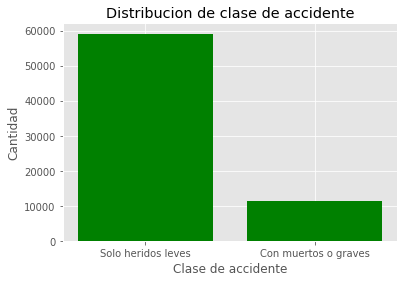

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

clase = df['Clase de accidente'].value_counts().index.tolist()

cantidad = df['Clase de accidente'].value_counts()

clase_pos = [i for i, _ in enumerate(clase)]

plt.bar(clase_pos, cantidad, color='green')
plt.xlabel("Clase de accidente")
plt.ylabel("Cantidad")
plt.title("Distribucion de clase de accidente")

plt.xticks(clase_pos, clase)

plt.show()

## Columnas Irrelevantes

En una primera inspeccion se observa que la columna **A_Accidente** es irrelevante ya que todos sus valores son 1.
Las columnas **Dia** y **Mes.1** poseen valores que están en las columnas **Día** y **Mes** respectivamente.

Se eliminan las columnas mencionadas.

In [30]:
df.drop(['A_Accidente', 'Dia', 'Mes.1'], axis=1, inplace=True)
df

,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,Distrito,Ruta,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Calzada horizontal,Tipo de calzada,Estado del tiempo,Tipo de circulación
0,Con muertos o graves,Salió de la vía,2015,Enero,Domingo,21,18:00-23:59,Puntarenas,Coto Brus,Sabalito,617,11,Nacional,Urbana,Desconocida,Curva,Asfalto,Oscuro,Objeto Fijo
1,Solo heridos leves,Colisión con objeto fijo,2013,Marzo,Domingo,5,00:00-05:59,San José,San José,Hospital,214,0,Nacional,Urbana,Pendiente,Curva,Asfalto,Buen tiempo,Desconocido
2,Solo heridos leves,Vuelco,2013,Febrero,Miércoles,12,12:00-17:59,San José,Puriscal,San Antonio,239,18,Nacional,Rural,Pendiente,Curva,Asfalto,Buen tiempo,Lateral en sentido contrario
3,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,17,12:00-17:59,San José,Mora,Colón,22,2,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto
4,Solo heridos leves,Atropello a persona,2013,Marzo,Miércoles,7,06:00-11:59,San José,Mora,Guayabo,239,15,Nacional,Rural,Plano,Recta,Asfalto,Buen tiempo,Desconocido
5,Solo heridos leves,Colisión con objeto fijo,2013,Junio,Sábado,22,18:00-23:59,San José,Desamparados,Damas,212,1,Nacional,Urbana,Plano,Recta,Asfalto,Desconocido,Otro
6,Solo heridos leves,Colisión con objeto fijo,2013,Agosto,Sábado,23,18:00-23:59,San José,San José,San Sebastián,39,7,Nacional,Urbana,Desconocida,Desconocida,Asfalto,Oscuro,Objeto Fijo
7,Solo heridos leves,Atropello a persona,2013,Febrero,Miércoles,8,06:00-11:59,San José,Desamparados,San Cristóbal,222,20,Nacional,Rural,Plano,Recta,Asfalto,Despejado,De frente
8,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Martes,22,18:00-23:59,San José,Alajuelita,San Felipe,177,2,Nacional,Urbana,Desconocida,Cruce,Asfalto,Oscuro,Desconocido
9,Solo heridos leves,Colisión con motocicleta,2013,Febrero,Miércoles,13,12:00-17:59,San José,San José,Hospital,Cantonal,Cantonal,Cantonal,Urbana,Desconocida,Cruce,Asfalto,Despejado,Angulo recto


In [31]:
df.shape

(70549, 19)

---

## Datos Faltantes

Se tienen campos donde no precisa su categoria exacta. Como lo son los valores: Desconocido, otro, ignorado, etc. alrededor del las diferentes columnas del dataset.

**Approach 0** Una primera estrategia consiste en eliminar por completos todo estos datos. Un poco estricto

**Approach 1** Una segunda estrategia consiste en eliminar la columna con el mayor numero de estos valores desconocidos presentados. Con el fin de preservar la mayor cantidad de datos posibles.

En el caso de la columna **Kilómetro** se presenta valores *Ignorado* y valores que no son consistentes con los demas datos y con su naturaleza de columna, numeros con escala de porcentajes (%). Para este caso se contabiliza, y se puede abordar de dos formas.

* **Approach 0** Eliminar los datos (son alrededor de 75 filas que presentan este tipo de dato). Se descartan mas datos
* **Approach 1** Reemplazarlo por 0, el cual significa que se pierde precision de ubicacion sobre la ruta. Se descartan menos datos.

**Nota**: el campo *Cantonal* es no es un valor faltante

In [32]:
num = 0
non_num = 0
for k in df['Kilómetro'].drop_duplicates():
    try:
        int(k)
        num += 1
    except ValueError:
        print(k)
        non_num += 1
print("---------------------------------------------")
print('Total de datos numericos   ', num)
print('Total de datos no numericos', non_num)

Cantonal
0,00%
Ignorado
3000,00%
700,00%
1600,00%
500,00%
800,00%
200,00%
3800,00%
8700,00%
26400,00%
400,00%
2200,00%
600,00%
100,00%
9200,00%
10800,00%
2500,00%
1000,00%
300,00%
3300,00%
1300,00%
900,00%
5200,00%
14300,00%
2300,00%
1200,00%
9500,00%
1900,00%
1400,00%
15400,00%
4400,00%
8100,00%
7300,00%
15300,00%
13600,00%
5700,00%
4500,00%
7500,00%
5100,00%
5400,00%
7800,00%
9400,00%
6600,00%
1500,00%
3400,00%
2700,00%
11500,00%
2600,00%
4900,00%
7000,00%
11900,00%
4200,00%
5600,00%
12900,00%
6100,00%
6700,00%
1100,00%
13400,00%
8600,00%
8000,00%
13800,00%
1800,00%
9700,00%
6400,00%
4600,00%
3900,00%
6800,00%
17600,00%
3200,00%
5000,00%
3600,00%
2000,00%
5300,00%
8500,00%
---------------------------------------------
Total de datos numericos    343
Total de datos no numericos 76


---

## Approach 0

In [33]:
df_approach_0 = (df.replace('Desconocida', np.nan)
        .replace('Desconocido', np.nan)
        .replace('Otro', np.nan)
        .replace('Ignorada', np.nan)
        .replace('Ignorado', np.nan)
       )

df_approach_0['Kilómetro'] = df_approach_0['Kilómetro'].replace('(.*)%', np.nan, regex=True)
df_approach_0.shape

(70549, 19)

In [34]:
df_approach_0.isna().sum()

Clase de accidente         0
Tipo de accidente          0
Año                        0
Mes                        0
Día                        0
Hora                       0
Hora recodificada          0
Provincia                  0
Cantón                     0
Distrito                   0
Ruta                     447
Kilómetro               1208
Tipo ruta                448
Rural o urbano           862
Calzada vertical        1687
Calzada horizontal     16776
Tipo de calzada          812
Estado del tiempo       1044
Tipo de circulación    13231
dtype: int64

Cantidad de filas descartadas

In [35]:
# dataset descartado
df_approach_0_with_nan = df_approach_0[df_approach_0.isna().any(axis=1)]
df_approach_0_with_nan.shape

(26991, 19)

In [36]:
df_approach_0 = df_approach_0.dropna()
df_approach_0.shape

(43558, 19)

In [37]:
df_approach_0['Clase de accidente'].value_counts()

Solo heridos leves      36170
Con muertos o graves     7388
Name: Clase de accidente, dtype: int64

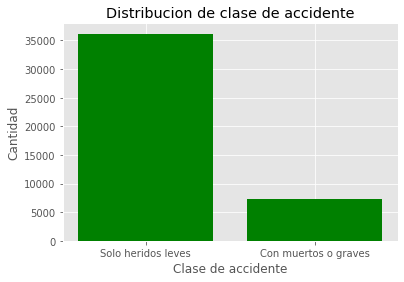

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

clase = df_approach_0['Clase de accidente'].value_counts().index.tolist()

cantidad = df_approach_0['Clase de accidente'].value_counts()

clase_pos = [i for i, _ in enumerate(clase)]

plt.bar(clase_pos, cantidad, color='green')
plt.xlabel("Clase de accidente")
plt.ylabel("Cantidad")
plt.title("Distribucion de clase de accidente")

plt.xticks(clase_pos, clase)

plt.show()

---

## Approach 1

Se intenta preservar la mayor parte de los datos del dataset original.

Se va a cambiar los valores "extraños" por NaN y despues estos se convierten en 0. 
La interpretación 0 corresponde a una aproximación de la ruta más cercana, es decir se prefiere una estimación cercana del kilómetro de la ruta a que se descarten.

In [39]:
df_approach_1 = (df.replace('Desconocida', np.nan)
        .replace('Desconocido', np.nan)
        .replace('Otro', np.nan)
        .replace('Ignorada', np.nan)
        .replace('Ignorado', np.nan)
       )

df_approach_1['Kilómetro'] = df_approach_1['Kilómetro'].replace('(.*)%', value=0, regex=True)
df_approach_1['Kilómetro'] = df_approach_1['Kilómetro'].replace(np.nan, value=0, regex=True)
df_approach_1.shape

(70549, 19)

Verificación de cuales son las columnas com mayores valores faltantes. 

In [40]:
df_approach_1.isna().sum()

Clase de accidente         0
Tipo de accidente          0
Año                        0
Mes                        0
Día                        0
Hora                       0
Hora recodificada          0
Provincia                  0
Cantón                     0
Distrito                   0
Ruta                     447
Kilómetro                  0
Tipo ruta                448
Rural o urbano           862
Calzada vertical        1687
Calzada horizontal     16776
Tipo de calzada          812
Estado del tiempo       1044
Tipo de circulación    13231
dtype: int64

Se verifica que las columnas con mayores valores faltantes son **Calzada horizontal** y **Tipo de circulación**. Por lo tanto se descartan.

In [41]:
df_approach_1.drop(['Calzada horizontal', 'Tipo de circulación'], axis=1, inplace=True)
df_approach_1.isna().sum()

Clase de accidente       0
Tipo de accidente        0
Año                      0
Mes                      0
Día                      0
Hora                     0
Hora recodificada        0
Provincia                0
Cantón                   0
Distrito                 0
Ruta                   447
Kilómetro                0
Tipo ruta              448
Rural o urbano         862
Calzada vertical      1687
Tipo de calzada        812
Estado del tiempo     1044
dtype: int64

Cantidad de datos descartadas

In [42]:
df_approach_1_with_nan = df_approach_1[df_approach_1.isna().any(axis=1)]
df_approach_1_with_nan.shape

(2952, 17)

Cantidad de datos restantes.

In [43]:
df_approach_1 = df_approach_1.dropna()
df_approach_1.shape

(67597, 17)

Verificacion de clase de accidente. Se observa que se preserva el desbalanceo de clases.

In [44]:
df_approach_1['Clase de accidente'].value_counts()

Solo heridos leves      56557
Con muertos o graves    11040
Name: Clase de accidente, dtype: int64

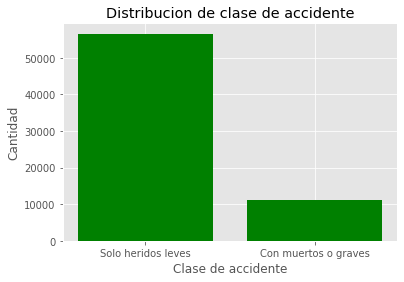

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

clase = df_approach_1['Clase de accidente'].value_counts().index.tolist()

cantidad = df_approach_1['Clase de accidente'].value_counts()

clase_pos = [i for i, _ in enumerate(clase)]

plt.bar(clase_pos, cantidad, color='green')
plt.xlabel("Clase de accidente")
plt.ylabel("Cantidad")
plt.title("Distribucion de clase de accidente")

plt.xticks(clase_pos, clase)

plt.show()

La estrategia es decartar datos por provincia en proporcion a la clase *Con muertos o graves*. 
Se utiliza un descarte aleatorio por provincia para preservar cierta uniformalidad. 

In [46]:
df_approach_1_count = df_approach_1.groupby(['Provincia', 'Clase de accidente'])['Clase de accidente'].count()
df_approach_1_count

Provincia   Clase de accidente  
Alajuela    Con muertos o graves     1932
            Solo heridos leves      11572
Cartago     Con muertos o graves      606
            Solo heridos leves       4897
Guanacaste  Con muertos o graves     1722
            Solo heridos leves       2522
Heredia     Con muertos o graves      886
            Solo heridos leves       6977
Limón       Con muertos o graves     1655
            Solo heridos leves       3567
Puntarenas  Con muertos o graves     1709
            Solo heridos leves       4513
San José    Con muertos o graves     2530
            Solo heridos leves      22509
Name: Clase de accidente, dtype: int64

Se utiliza una variable *extended* que pretende ofrecer una ventana de datos más. Con *extended* **menor** que el total de los datos de la clase **Con muertos o graves**

In [47]:
extended = 500

alajuela1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'Alajuela') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

alajuela1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'Alajuela') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_alajuela1_leve = alajuela1_leve.sample(n=len(alajuela1_muerto)+extended, random_state=23)


cartago1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'Cartago') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

cartago1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'Cartago') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_cartago1_leve = cartago1_leve.sample(n=len(cartago1_muerto)+extended, random_state=23)


guanacaste1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'Guanacaste') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

guanacaste1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'Guanacaste') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_guanacaste1_leve = guanacaste1_leve.sample(n=len(guanacaste1_muerto)+extended, random_state=23)


heredia1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'Heredia') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

heredia1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'Heredia') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_heredia1_leve = heredia1_leve.sample(n=len(heredia1_muerto)+extended, random_state=25)


limon1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'Limón') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

limon1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'Limón') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_limon1_leve = limon1_leve.sample(n=len(limon1_muerto)+extended, random_state=83)


puntarenas1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'Puntarenas') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

puntarenas1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'Puntarenas') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_puntarenas1_leve = puntarenas1_leve.sample(n=len(puntarenas1_muerto)+extended, random_state=3)


sanjose1_leve = df_approach_1[
    (df_approach_1['Provincia'] == 'San José') 
    & (df_approach_1['Clase de accidente'] == 'Solo heridos leves')]

sanjose1_muerto = df_approach_1[
    (df_approach_1['Provincia'] == 'San José') 
    & (df_approach_1['Clase de accidente'] == 'Con muertos o graves')]

samp_sanjose1_leve = sanjose1_leve.sample(n=len(sanjose1_muerto)+extended, random_state=8)




Se agregan los subsets de provincias para la clase *Solo heridos leves* y *Con muertos o graves*.

In [48]:
alajuela1 = samp_alajuela1_leve.append(alajuela1_muerto)
cartago1 = samp_cartago1_leve.append(cartago1_muerto)
guanacaste1 = samp_guanacaste1_leve.append(guanacaste1_muerto)
heredia1 = samp_heredia1_leve.append(heredia1_muerto)
limon1 = samp_limon1_leve.append(limon1_muerto)
puntarenas1 = samp_puntarenas1_leve.append(puntarenas1_muerto)
sanjose1 = samp_sanjose1_leve.append(sanjose1_muerto)

print(alajuela1.shape)
print(cartago1.shape)
print(guanacaste1.shape)
print(heredia1.shape)
print(limon1.shape)
print(puntarenas1.shape)
print(sanjose1.shape)

(4364, 17)
(1712, 17)
(3944, 17)
(2272, 17)
(3810, 17)
(3918, 17)
(5560, 17)


Se agregan los subsets de pronvincias en un solo dataset nuevo **balanceado.**

In [49]:
accidentes_cr = alajuela1.append(cartago1)
accidentes_cr = accidentes_cr.append(guanacaste1)
accidentes_cr = accidentes_cr.append(heredia1)
accidentes_cr = accidentes_cr.append(limon1)
accidentes_cr = accidentes_cr.append(puntarenas1)
accidentes_cr = accidentes_cr.append(sanjose1)

print(accidentes_cr.groupby(['Provincia', 'Clase de accidente'])['Clase de accidente'].count())
print(accidentes_cr.shape)

Provincia   Clase de accidente  
Alajuela    Con muertos o graves    1932
            Solo heridos leves      2432
Cartago     Con muertos o graves     606
            Solo heridos leves      1106
Guanacaste  Con muertos o graves    1722
            Solo heridos leves      2222
Heredia     Con muertos o graves     886
            Solo heridos leves      1386
Limón       Con muertos o graves    1655
            Solo heridos leves      2155
Puntarenas  Con muertos o graves    1709
            Solo heridos leves      2209
San José    Con muertos o graves    2530
            Solo heridos leves      3030
Name: Clase de accidente, dtype: int64
(25580, 17)


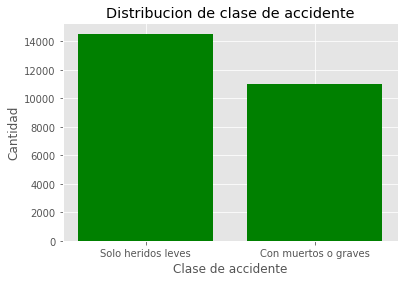

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

clase = accidentes_cr['Clase de accidente'].value_counts().index.tolist()

cantidad = accidentes_cr['Clase de accidente'].value_counts()

clase_pos = [i for i, _ in enumerate(clase)]

plt.bar(clase_pos, cantidad, color='green')
plt.xlabel("Clase de accidente")
plt.ylabel("Cantidad")
plt.title("Distribucion de clase de accidente")

plt.xticks(clase_pos, clase)

plt.show()

In [51]:
accidentes_cr.head(5)

,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,Distrito,Ruta,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Tipo de calzada,Estado del tiempo
30702,Solo heridos leves,Colisión entre vehículos,2016,Octubre,Jueves,16,12:00-17:59,Alajuela,San Carlos,Pocosol,35,27,Nacional,Rural,Plano,Asfalto,Buen tiempo
49716,Solo heridos leves,Colisión entre vehículos,2014,Noviembre,Sábado,0,00:00-05:59,Alajuela,San Carlos,Quesada,140,37,Nacional,Urbana,Plano,Asfalto,Buen tiempo
25478,Solo heridos leves,Vuelco,2015,Marzo,Sábado,12,12:00-17:59,Alajuela,Grecia,Tacares,118,8,Nacional,Rural,Pendiente,Asfalto,Buen tiempo
66189,Solo heridos leves,Colisión con objeto fijo,2017,Setiembre,Martes,16,12:00-17:59,Alajuela,Alajuela,San Antonio,Cantonal,0,Cantonal,Urbana,Plano,Asfalto,Buen tiempo
59968,Solo heridos leves,Salió de la vía,2014,Junio,Martes,17,12:00-17:59,Alajuela,Grecia,Puente de Piedra,1,33,Nacional,Rural,Pendiente,Asfalto,Neblina escasa


**Nota: El dataset nuevo preprocesado esta "ordenado" por su manera de construccion. Se debe hacer un shuffle a la hora de entregar los algoritmos**

In [52]:
from sklearn.utils import shuffle

accidentes_cr = shuffle(accidentes_cr, random_state=88)
accidentes_cr = shuffle(accidentes_cr, random_state=13)
accidentes_cr = shuffle(accidentes_cr, random_state=75)
accidentes_cr

,Clase de accidente,Tipo de accidente,Año,Mes,Día,Hora,Hora recodificada,Provincia,Cantón,Distrito,Ruta,Kilómetro,Tipo ruta,Rural o urbano,Calzada vertical,Tipo de calzada,Estado del tiempo
62007,Solo heridos leves,Salió de la vía,2015,Setiembre,Jueves,2,00:00-05:59,Limón,Pococí,Guápiles,32,49,Nacional,Rural,Plano,Asfalto,Lluvia mediana
42456,Solo heridos leves,Colisión con motocicleta,2017,Diciembre,Sábado,8,06:00-11:59,Puntarenas,Puntarenas,Barranca,1,92,Nacional,Urbana,Pendiente,Asfalto,Buen tiempo
69877,Solo heridos leves,Otros,2015,Diciembre,Lunes,8,06:00-11:59,Guanacaste,Liberia,Liberia,918,1,Nacional,Urbana,Plano,Asfalto,Buen tiempo
42552,Con muertos o graves,Colisión con bicicleta,2017,Noviembre,Sábado,19,18:00-23:59,Limón,Pococí,Cariari,247,22,Nacional,Rural,Plano,Asfalto,Buen tiempo
9584,Solo heridos leves,Colisión con motocicleta,2014,Setiembre,Sábado,13,12:00-17:59,Cartago,Cartago,San Nicolás,2,22,Nacional,Urbana,Plano,Asfalto,Buen tiempo
29937,Solo heridos leves,Vuelco,2016,Marzo,Jueves,7,06:00-11:59,Alajuela,Alajuela,San Antonio,Cantonal,0,Cantonal,Urbana,Plano,Asfalto,Despejado
49648,Con muertos o graves,Atropello a persona,2014,Agosto,Viernes,22,18:00-23:59,Limón,Limón,Limón,Cantonal,Cantonal,Cantonal,Urbana,Plano,Lastre,Lluvia escasa
472,Solo heridos leves,Colisión entre vehículos,2013,Marzo,Viernes,13,12:00-17:59,Heredia,Heredia,Heredia,Cantonal,Cantonal,Cantonal,Urbana,Plano,Asfalto,Buen tiempo
26343,Solo heridos leves,Colisión con motocicleta,2016,Junio,Sábado,21,18:00-23:59,Guanacaste,Nicoya,Nicoya,Cantonal,0,Cantonal,Urbana,Plano,Asfalto,Lluvia escasa
39771,Solo heridos leves,Colisión entre vehículos,2017,Noviembre,Jueves,16,12:00-17:59,Cartago,Alvarado,Cervantes,Cantonal,0,Cantonal,Urbana,Plano,Asfalto,Buen tiempo


---

## Conversión variables categóricas a numéricas
En el dataset hay 12 variables categóricas que deben ser codificados numéricamente para poder procesadas por el modelo de aprendizaje supervisado.   Esto se hace mediante la técnica One Hot Encoding,  empleando la función de Pandas get.dummies.

In [53]:

set1 = df[
    ['Tipo de accidente', 
     'Año', 
     'Mes', 
     'Hora recodificada',
     'Provincia', 
     'Tipo ruta', 
     'Rural o urbano', 
     'Calzada vertical',
     'Calzada horizontal', 
     'Tipo de calzada', 
     'Estado del tiempo',
     'Tipo de circulación']
]
set1_ohe = pd.DataFrame()

for feature in set1:
    onehot_features = pd.get_dummies(df[feature])
    set1_ohe = pd.concat([set1_ohe, onehot_features], axis=1)

#Dataframe con las variables categóricas debidamente codificadas
set1_ohe.shape

(70549, 82)

In [54]:
set1.head()

,Tipo de accidente,Año,Mes,Hora recodificada,Provincia,Tipo ruta,Rural o urbano,Calzada vertical,Calzada horizontal,Tipo de calzada,Estado del tiempo,Tipo de circulación
0,Salió de la vía,2015,Enero,18:00-23:59,Puntarenas,Nacional,Urbana,Desconocida,Curva,Asfalto,Oscuro,Objeto Fijo
1,Colisión con objeto fijo,2013,Marzo,00:00-05:59,San José,Nacional,Urbana,Pendiente,Curva,Asfalto,Buen tiempo,Desconocido
2,Vuelco,2013,Febrero,12:00-17:59,San José,Nacional,Rural,Pendiente,Curva,Asfalto,Buen tiempo,Lateral en sentido contrario
3,Colisión con motocicleta,2013,Febrero,12:00-17:59,San José,Nacional,Urbana,Plano,Recta,Asfalto,Buen tiempo,Angulo recto
4,Atropello a persona,2013,Marzo,06:00-11:59,San José,Nacional,Rural,Plano,Recta,Asfalto,Buen tiempo,Desconocido


In [55]:
#data.groupby(['month']).groups.keys()

df.groupby(['Año', 'Clase de accidente'])['Clase de accidente'].count()
df.groupby(['Estado del tiempo', 'Clase de accidente'])['Clase de accidente'].count()


Estado del tiempo  Clase de accidente  
Buen tiempo        Con muertos o graves     8247
                   Solo heridos leves      41062
Desconocido        Con muertos o graves      152
                   Solo heridos leves        787
Despejado          Con muertos o graves      965
                   Solo heridos leves       7199
Lluvia escasa      Con muertos o graves      710
                   Solo heridos leves       3708
Lluvia intensa     Con muertos o graves      238
                   Solo heridos leves        876
Lluvia mediana     Con muertos o graves      417
                   Solo heridos leves       2266
Neblina escasa     Con muertos o graves       35
                   Solo heridos leves        238
Neblina intensa    Con muertos o graves       34
                   Solo heridos leves        120
Neblina media      Con muertos o graves       12
                   Solo heridos leves         59
Oscuro             Con muertos o graves      609
                   Solo herid

In [56]:
#Codificar en forma numérica las variables de salida. 
sety1 =  pd.get_dummies(df['Clase de accidente'])
sety1.shape

(70549, 2)

## Preparación de datos de entrenamiento y prueba

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(set1_ohe, sety1, random_state=17) 

print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (52911, 82)
y_train: (52911, 2)
X_test: (17638, 82)
y_test: (17638, 2)


## Aplicación del modelo de aprendizaje supervisado
Se usa modelo de Arbol de Decisión de la librería Sklearn

In [58]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Evaluación del modelo de aprendizaje supervisado

In [59]:
from sklearn.metrics import accuracy_score

y_predict = DecisionTreeModel.predict(X_test)
dt1 = accuracy_score(y_test, y_predict)
dt1



0.8421589749404694

### Análisis de resultados
Las métricas de desempeño indican que el modelo generaliza correctamente con un nivel de profundiidad y en el arbol de decisión e incluyendo todas las variables del dataset.

### Análisis de importancia de variables

In [60]:
#ANTHONY
#importances = DecisionTreeModel.feature_importances_
importances = pd.DataFrame({'feature' : X_train.columns, 'importance':DecisionTreeModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(25)

,importance
feature,
Guanacaste,0.321866
Limón,0.204158
Puntarenas,0.158165
Rural,0.107780
00:00-05:59,0.074501
De frente,0.032383
Colisión con motocicleta,0.019094
Vuelco,0.017895
Nacional,0.017620


In [61]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

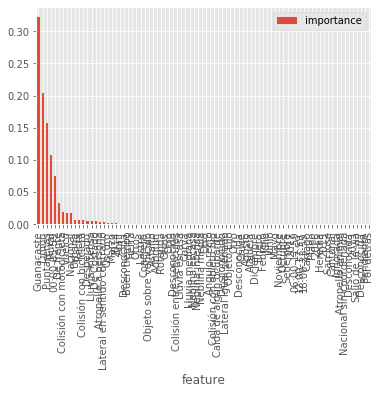

In [62]:
importances.plot.bar()

### Del análisis de importancia de variables se evidencia que hay cinco variables codificadas con mucho mayor importancia en el modelo.  Ahora bien, estas variables codificadas corresponden a tres variables categoricas:  Provincia, hora y Tipo de ruta (rural o urbana)

## Modelo considerando menos variables

In [63]:
set1 = df[
    ['Tipo de accidente', 
     'Hora recodificada',
     'Provincia',
     'Rural o urbano', 
     'Estado del tiempo',
     'Tipo de circulación']
]
set1_ohe = pd.DataFrame()

for feature in set1:
    onehot_features = pd.get_dummies(df[feature])
    set1_ohe = pd.concat([set1_ohe, onehot_features], axis=1)

#Dataframe con las variables categóricas debidamente codificadas

#Codificar en forma numérica las variables de salida. 
sety1 =  pd.get_dummies(df['Clase de accidente'])


X_train, X_test, y_train, y_test = train_test_split(set1_ohe, sety1, random_state=17) 

print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

DecisionTreeModel = DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)

y_predict = DecisionTreeModel.predict(X_test)
dt1 = accuracy_score(y_test, y_predict)
dt1

X_train: (52911, 45)
y_train: (52911, 2)
X_test: (17638, 45)
y_test: (17638, 2)


0.8423857580224515

## Se conservan las mismas métricas de desempeño considerando menos variables.

# Análisis de resultados

Los resultados muestran que las variables que más incidencia tienen en el modelo son las provincia, hora del accidente y tipo de ruta.   Un análisis por provincia muestra algunos datos muy descriptivos:

In [64]:
df.groupby(['Provincia', 'Clase de accidente'])['Clase de accidente'].count()

Provincia   Clase de accidente  
Alajuela    Con muertos o graves     1988
            Solo heridos leves      11973
Cartago     Con muertos o graves      647
            Solo heridos leves       5204
Guanacaste  Con muertos o graves     1790
            Solo heridos leves       2671
Heredia     Con muertos o graves      905
            Solo heridos leves       7203
Limón       Con muertos o graves     1712
            Solo heridos leves       3762
Puntarenas  Con muertos o graves     1766
            Solo heridos leves       4783
San José    Con muertos o graves     2640
            Solo heridos leves      23505
Name: Clase de accidente, dtype: int64

Tabulando esos datos y obteniendo una relación muertes/accidentes leves por provicia se encuentran algunos hallazgos importantes:

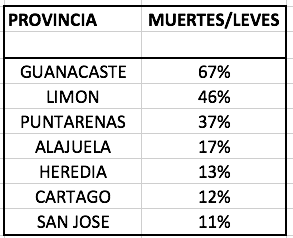

Nótese la marcada diferencie en la proporción muertes/accidentes leves en las provincias fuera del Valle Central.

Otro dato que conviene evaluar es sobre los tipos de accidentes que provocam más muertes,  para eso se agrupan los resultados sobre esta variable:


In [65]:
df.groupby(['Tipo de accidente', 'Clase de accidente'])['Clase de accidente'].count()

Tipo de accidente         Clase de accidente  
Atropello a persona       Con muertos o graves     2043
                          Solo heridos leves       7963
Atropello animal          Con muertos o graves      102
                          Solo heridos leves        539
Caída de algún ocupante   Con muertos o graves       53
                          Solo heridos leves        623
Colisión con bicicleta    Con muertos o graves      930
                          Solo heridos leves       3721
Colisión con motocicleta  Con muertos o graves     4503
                          Solo heridos leves      22981
Colisión con objeto fijo  Con muertos o graves      490
                          Solo heridos leves       1628
Colisión entre vehículos  Con muertos o graves     1659
                          Solo heridos leves      12240
Objeto sobre vehículo     Con muertos o graves       20
                          Solo heridos leves        107
Otros                     Con muertos o graves       77
 

Es evidente que la colisión con motocicleta es la principal causa de muertes por accidentes de tránsito durante el período estudiado.   



## CONCLUSIONES


La tasa de accidentes por cada 100,000 habitantes en Costa Rica es considerada una epidemia por parte de los organismos internacionales.
El análisis de datos permite concluir que el fenómeno se presenta con mayor incidencia en las provincias fuera del Area Metropolitana,  en horas de la noche y en caminos rurales.
Todo esto apunta a que en estas zonas,  las deficiencias en la infraestructura vial son más marcadas.  Es posible que la mala demarcación, falta de iluminación y mal estado en general de las rutas rurales sean los principales factores que inciden en este problema.

En general podemos concluir que el mayor nivel de peligrosidad lo padecen las personas que conduzcan una motocicleta en horas de la noche fuera del Area Metropolitana.

Las acciones y recomendaciones a seguir están fuera del objeto de este trabajo.  Tocará a los expertos en el tema decidir que acciones concretas se pueden tomar para reducir ese indicador tan nefasto para la salud pública.  

Pero el resultado de este trabajo muestra datos relevantes como punto de partida para estudios más profundos y elaborados.



In [66]:
df.groupby(['Provincia',('Tipo de accidente'), 'Clase de accidente'])['Clase de accidente'].count()

Provincia   Tipo de accidente         Clase de accidente  
Alajuela    Atropello a persona       Con muertos o graves      386
                                      Solo heridos leves       1563
            Atropello animal          Con muertos o graves        8
                                      Solo heridos leves         85
            Caída de algún ocupante   Con muertos o graves        7
                                      Solo heridos leves        126
            Colisión con bicicleta    Con muertos o graves      123
                                      Solo heridos leves        699
            Colisión con motocicleta  Con muertos o graves      836
                                      Solo heridos leves       4306
            Colisión con objeto fijo  Con muertos o graves       83
                                      Solo heridos leves        363
            Colisión entre vehículos  Con muertos o graves      297
                                      Solo heridos leves 

In [67]:
# from sklearn.ensemble import RandomForestClassifier

# RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)
# RandomForestModel.fit(X_train, y_train)

In [68]:
# y_predict = RandomForestModel.predict(X_test)
# rf = accuracy_score(y_test,y_predict)
# rf

In [69]:
# importances = pd.DataFrame({'feature' : X_train.columns, 'importance':RandomForestModel.feature_importances_})
# importances = importances.sort_values('importance', ascending = False).set_index('feature')
# importances.head(9)

In [70]:
#df_approach_0['Clase de accidente'].value_counts()
df_approach_0.shape

(43558, 19)

In [71]:
set2 = df_approach_0[
    ['Tipo de accidente', 
     'Año', 
     'Mes', 
     'Hora recodificada',
     'Provincia', 
     'Tipo ruta', 
     'Rural o urbano', 
     'Calzada vertical',
     'Calzada horizontal', 
     'Tipo de calzada', 
     'Estado del tiempo',
     'Tipo de circulación']
]
set2_ohe = pd.DataFrame()

for feature in set1:
    onehot_features = pd.get_dummies(df_approach_0[feature])
    set2_ohe = pd.concat([set2_ohe, onehot_features], axis=1)

#set2_ohe.shape
set2.shape
set2_ohe.shape

(43558, 40)

In [72]:
sety2 =  pd.get_dummies(df_approach_0['Clase de accidente'])
sety2.shape

(43558, 2)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(set2_ohe, sety2, random_state=17) 

In [74]:
DecisionTreeModel = DecisionTreeClassifier(max_depth = 7)
DecisionTreeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [75]:
y_predict = DecisionTreeModel.predict(X_test)
dt2 = accuracy_score(y_test, y_predict)
dt2



0.8281910009182737